---
title: "Data Gathering"
format: 
    html:
        code-fold: true

---

Data collection is the process of building systems to collect and measure information about target variables. It is a useful tool that enables people to answer relevant questions and evaluate results. It is the foundation of all data science projects. In my project, data collection is very important. It can help me collect some self-media-related data, such as related surveys on Internet celebrities, customer feedback, comparison of various social platforms, and so on.

In the process of data collection, I used the Twitter API to grab data, and also used some ready-made data sets, and I also made detailed annotations in the reference.

## Introduction
Based on 10 questions I want to research through the introduction tab:

    What does WE media bring to us?

    What advantages does WE media have?

    What disadvantages does WE media have?

    Should ad sales focus move further online? 

    What is the employment prospect of WE media? 

    What factors does online influencer has to be success? 

    How to use WE media to earn money?

    What does data anlytics play in WE media? How important? 

    Companies V.S. Individual 
    
    Should people choose WE media to develop their careers due to the popularity trend?


I plan to collect several types of datasets which are:

1. Use twitter API to collect consumers' reviews about consumer privacy and some ethical questions
2. Use twitter API to compare with popularities of different social media platforms
3. Collect internet influencers in a certain social platform in order to calculate the factors they have in order to calculate what the most important factor an internet influencer need to have in order to become success
4. Generate consumers' responses about advertisements in order to do a research on which kind of factor will cause consumers to click on ad, what factors need instagram influencers have in order to promote consumers to buy products from their promotion. 

## Modified data
### Instagram Influencer dataset
Instagram is one of the most popular and famous platforms for users to network, post their daily lives. There are a lot of famous internet influencers here. Instagram is also one of the important parts for wemedia to develop. Users can create channels to post their daily lives, show their abilities, post some fun videos in order to attract more fans. Ad sellers also analyze their business value to contact instagram influencers to promote their products in order to gain more benefits. 

In this dataset, it clearly shows followers'number, average likes each post, country etc. I would like to use this dataset to deeper analyze the trend of internet influencers followers. Country distribution of these influencers. More than this, I would like to use other datasets to locate the fields which these inernet influencers focus to further analyze factors of these internet influencers. What makes them success. 

channel info: Username in instagram

influence score: It is calculated based on their popularity.

posts: total posts they have

followers: total followers they have

avg_likes: average likes of their total posts

60_days_eng_rate: 60 days of engagement rate

new_post_avg_like: a calculation of the average likes they gained from new posts. 

total_likes: total likes of their posts in instagram.

country: users' origin. What countries they from?

In [2]:
 import pandas as pd
 instagram_infl = pd.read_csv("../data/00-raw-data/top_insta_influencers_data.csv")
 instagram_infl.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


### Dataset: Advertiments click
Advertisements is one of the important sources for internet influencers to earn benefits and money from social media platforms. In this dataset, we will work on an advertising dataset. There are many features to determine whether internet users will click on advertisements. 


    This datasets contain these columns:


    Daily Time Spent on Site: internet users' time consumptions on site in minutes


    Age: Internet users' ages in years


    Area Income: Internet users' average incomes in geographical area


    Daily Internet Usage: Daily average internet time consumptions of internet users in minutes


    Ad Topic Line: Headline of the advertisement


    City: City of consumer


    Male: Whether or not consumer was male


    Country: Country of consumer


    Timestamp: Time at which consumer clicked on Ad or closed window


    Clicked on Ad: 0 or 1 indicated clicking on Ad

In [5]:
adv = pd.read_csv("../data/01-modified-data/advertising.csv")
adv = adv.select_dtypes(['number'])
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


### Twitter API in python

Python: I used twitter API to scratch mutiple keywords:"media" "internet influencers" "consumer privacy" "data" to gather comments from twiter about their opinion about the wemedia. I use these data to analyze the positive and negative opinion. I can detect the internet users' attitudes to consumers' privacy. I can also use this datasets to define the relationship between data and media. The keywords may not clear enough for me to analysis but I will adjust it later for future research. I used for loop to search over 600 tweets in order to make comprehensive datasets. I will collect more in the future to scratch over 2000 tweets in order to make sure my results are accurate. I plan to detect the frequency of words to gain a plot. More than this, I plan to use Naive Bytes to give each tweet a positive or negative attitude.

Step1: Load the file to get the consumer key, consumer secret, access token, access token secret, bearer token

Step2: Load keys into API

Step3: Set up connection in order to use twitter API to scratch data

Step4: Create search twitter function in order to use certain keywords to get useful information

Step5: Assign the tweet fields in order to build what type of factors we need to use

Step6: Generate the data through key words: media','internet_influencer','data','consumer privacy'. I search twitter 13 times for each keywords with 100 reviews. More than this, when one time search completed, the code will go sleep in 90 seconds in order to prevent duplicate information

Step7: Use json_normalize function in order to collect all data as dataframes.

Step8: Get a whole dataframe from Twitter API

In [2]:
import json 

# READ FILE
f = open("/Users/yangyilin/Desktop/2022-fall-anly/501/lab/lab1.2/api-keys.json")
input=json.load(f); #print(input)

# LOAD KEYS INTO API
consumer_key=input["consumer_key"]    
consumer_secret=input["consumer_secret"]    
access_token=input["access_token"]    
access_token_secret=input["access_token_secret"]    
bearer_token=input["bearer_token"] 

In [3]:
import tweepy
import requests
# Set up Connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [6]:
# Add the search_twitter function here.
def search_twitter(query, max_results,tweet_fields, bearer_token = bearer_token,lang='en'):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&max_results={}&{}".format(query, max_results,tweet_fields,lang)
    print("--------------",url,"--------------")
    response = requests.request("GET", url, headers=headers)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [4]:
tweet_fields = "tweet.fields=text,author_id,created_at,lang"

In [8]:
data = "/Users/yangyilin/Desktop/2022-fall-anly/501/project"
import json
from logging import raiseExceptions 
import tweepy
import time
from datetime import datetime
import time
import os
search_tweets = ['media','internet_influencer','data','consumer_privacy']
for idx,val in enumerate(search_tweets):
    tweets_jsondump = []
    json_response1 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response2 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response3 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response4 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response5 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response6 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response7 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response8 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response9 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response10 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response11 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response12 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    time.sleep(90)
    json_response13 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token, lang="en")
    for i in json_response1['data']:
        tweets_jsondump.append(i)
    for i in json_response2['data']:
        tweets_jsondump.append(i)
    for i in json_response3['data']:
        tweets_jsondump.append(i)
    for i in json_response4['data']:
        tweets_jsondump.append(i)
    for i in json_response5['data']:
        tweets_jsondump.append(i)
    for i in json_response6['data']:
        tweets_jsondump.append(i)
    for i in json_response7['data']:
        tweets_jsondump.append(i)
    for i in json_response7['data']:
        tweets_jsondump.append(i)
    for i in json_response9['data']:
        tweets_jsondump.append(i)
    for i in json_response10['data']:
        tweets_jsondump.append(i)
    for i in json_response11['data']:
        tweets_jsondump.append(i)
    for i in json_response12['data']:
        tweets_jsondump.append(i)
    for i in json_response13['data']:
        tweets_jsondump.append(i)
    with open(data+str(val)+'.json','w') as json_file:
        json.dump(tweets_jsondump,json_file)
        json_file.close()

-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=tex

In [9]:
from pandas import json_normalize 
import pandas as pd
twitterdf1 = json_normalize(json_response1,"data")
twitterdf2 = json_normalize(json_response2,"data")
twitterdf3 = json_normalize(json_response3,"data")
twitterdf4 = json_normalize(json_response4,"data")
twitterdf5 = json_normalize(json_response5,"data")
twitterdf6 = json_normalize(json_response6,"data")
twitterdf7 = json_normalize(json_response7,"data")
twitterdf8 = json_normalize(json_response8,"data")
twitterdf9 = json_normalize(json_response9,"data")
twitterdf10 = json_normalize(json_response10,"data")
twitterdf11 = json_normalize(json_response11,"data")
twitterdf12 = json_normalize(json_response12,"data")
twitterdf13 = json_normalize(json_response13,"data")
twitterdf = [twitterdf1,twitterdf2,twitterdf3,twitterdf4,twitterdf5,twitterdf6,twitterdf7,twitterdf8,twitterdf9,twitterdf10,twitterdf11,twitterdf12,twitterdf13]
twitterdf = pd.concat(twitterdf)

In [10]:
twitterdf.head()

,text,lang,id,edit_history_tweet_ids,created_at,author_id
0,Virginia’s Consumer Data Protection Act Is Not...,en,1598150525270122496,[1598150525270122496],2022-12-01T03:02:32.000Z,16657603
1,consumer tech YouTuber x political satirist sh...,en,1598144312851959808,[1598144312851959808],2022-12-01T02:37:50.000Z,785970644668194816
2,We oppose consolidation in the industry that u...,en,1598138577623613440,[1598138577623613440],2022-12-01T02:15:03.000Z,1590746349389185025
3,@maker31790747 Until digital money government-...,en,1598136283985215488,[1598136283985215488],2022-12-01T02:05:56.000Z,1272443941435199488
4,Both consumer advocates and business groups ar...,en,1598133095600988162,[1598133095600988162],2022-12-01T01:53:16.000Z,34613951


In [ ]:
twitterdf.to_csv("/Users/yangyilin/Desktop/anly-501-project-YilinYang2000-1/data/00-raw-data/twitterpython.csv")

### Twitter API in R

For R API, I used twitter to scratch keywords like "instagram, tiktok, youtube, facebook" to scratch users' attitudes about these platforms. I want to search different types of social media platforms in order to do popularity comparison between them. What users discussed more have more tendency to get more popularity. I will build a simple wordcloud at the first glimpse.

Step1: Load the required packages

Step2: Use consumer key in order to build a connection between twitter API and R

Step3: Use twitteR package in order to search on twitter and scratch useful information

Step4: Store data into dataframes and combine them together

In [1]:
library(selectr)
library(rvest)
library(xml2)
library(rtweet) # for scraping tweets
library(wordcloud2) # for generating really cool looking wordclouds
library(tm) # for text minning
library(dplyr) # loads of fun stuff including piping
library(ROAuth)
library(jsonlite)
library(httpuv)

Loading required package: NLP


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘jsonlite’


The following object is masked from ‘package:rtweet’:

    flatten




In [2]:
consumer_key = "9TVmMW3pyds9CwlMhgXBK5Bu5"
consumer_secret = "lTXYO7I5nKTGOp7zJG7jtf7dCmYoQLtbgB4a0w6BZN6ct4mNxT"
access_token = "1553871190036516864-ahw9mcZ1pq36DzwsD7CFgvU0iMnOy4"
access_token_secret = "8DhWYScYuF6KofqS9Gt7ajYs7B4DZKkZSBhoMPgyfnTFp"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAOfFfQEAAAAARkEQiS1bfu9c96%2FD%2FvzbetKGYZk%3DKNBdl2kUeIysZ9wV6n6O4X3zp5enoR6Onp6LqEKQVldRKaDcum"

In [3]:
library(twitteR)
requestURL='https://api.twitter.com/oauth/request_token'
accessURL='https://api.twitter.com/oauth/access_token'
authURL='https://api.twitter.com/oauth/authorize'

s_key  = 'instagram OR tik tok OR facebook OR youtube'
n_tweets = 250 

twitteR:::setup_twitter_oauth(consumer_key, consumer_secret,access_token,access_token_secret)
Search1<-twitteR::searchTwitter(s_key,n=n_tweets, since="2022-04-01",lang="en")


Attaching package: ‘twitteR’


The following objects are masked from ‘package:dplyr’:

    id, location


The following object is masked from ‘package:rtweet’:

    lookup_statuses




[1] "Using direct authentication"


In [5]:
TweetsDF<- twListToDF(Search1)
head(TweetsDF)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
,<chr>,<lgl>,<dbl>,<chr>,<dttm>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,RT @ATEEZofficial: [🎬] Whole new Paradigm✨ #홍중 #성화 ⠀ ⠀ 🔗 https://t.co/vhRJDmpIRv 🔗 https://t.co/sXpRoqdkO8 🔗 https://t.co/SO8CQixBvu ⠀ ⠀ #A…,FALSE,0,NA,2022-12-01 06:03:27,FALSE,NA,1598196056629866497,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",jyunholoved,1922,TRUE,FALSE,NA,NA
2,RT @ygent_official: NVP PROJECT – YG PLUS VIRTUAL ARTIST BRIEFING NVP PROJECT BRIEFING VIDEO OUT NOW ➡️ NOW ON YOUTUBE 🔗SAE NA https://t.…,FALSE,0,NA,2022-12-01 06:03:27,FALSE,NA,1598196054985703424,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",ssahiikun,421,TRUE,FALSE,NA,NA
3,@nonoworks I seen the clips and I have seen done funny tik tok edits they are funny,FALSE,0,nonoworks,2022-12-01 06:03:27,FALSE,1597953553191956480,1598196054205554688,2929089169,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",zeldadungeon234,0,FALSE,FALSE,NA,NA
4,RT @LaliceUpdates: .@facebook: “you are magic ✨” 🔗 https://t.co/MoGBxAoOjN #NETIZENSREPORT #LISA for Asian Celebrity of the Year #ACOTY20…,FALSE,0,NA,2022-12-01 06:03:25,FALSE,NA,1598196048371265536,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",hiimblinklisa,438,TRUE,FALSE,NA,NA
5,Good morning fam💕 Please kindly Join us for Next Level Prayers YouTube: https://t.co/Q5qhU7bcCE Instagram:… https://t.co/2LV0ceT263,FALSE,0,NA,2022-12-01 06:03:24,TRUE,NA,1598196043472334849,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",DefreshKitchen1,0,FALSE,FALSE,NA,NA
6,RT @ATEEZofficial: [🎬] Whole new Paradigm✨ #홍중 #성화 ⠀ ⠀ 🔗 https://t.co/vhRJDmpIRv 🔗 https://t.co/sXpRoqdkO8 🔗 https://t.co/SO8CQixBvu ⠀ ⠀ #A…,FALSE,0,NA,2022-12-01 06:03:23,FALSE,NA,1598196039160209408,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",dazzwoosan,1922,TRUE,FALSE,NA,NA


In [ ]:
write.csv(TweetsDF,"../data/00-raw-data/tweetinr.csv")

In [6]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Loading required package: RColorBrewer



In [7]:
twittertext = Corpus(VectorSource(TweetsDF$text))
toSpace = content_transformer(
              function (x, pattern)
              gsub(pattern, " ", x))
twittertext1 = tm_map(twittertext, toSpace, "/")
twittertext1 = tm_map(twittertext, toSpace, "@")
twittertext1 = tm_map(twittertext, toSpace, "#")

Warning message in tm_map.SimpleCorpus(twittertext, toSpace, "/"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(twittertext, toSpace, "@"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(twittertext, toSpace, "#"):
“transformation drops documents”


In [8]:
twittertext1 = tm_map(twittertext1, content_transformer(tolower))
twittertext1 = tm_map(twittertext1, removeNumbers)
twittertext1 = tm_map(twittertext1, stripWhitespace)

Warning message in tm_map.SimpleCorpus(twittertext1, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(twittertext1, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(twittertext1, stripWhitespace):
“transformation drops documents”


In [9]:
twittertm = TermDocumentMatrix(twittertext1)
m = as.matrix(twittertm)
v = sort(rowSums(m), 
         decreasing = TRUE)
d = data.frame(word = names(v),
               freq = v)
head(d, 10)

,word,freq
,<chr>,<dbl>
⠀,⠀,412
🔗,🔗,333
new,new,105
whole,whole,105
paradigm✨,paradigm✨,104
성화,성화,104
홍중,홍중,104
@ateezofficial:,@ateezofficial:,103
[🎬],[🎬],103


Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on '⠀' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on '⠀' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on '⠀' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on '⠀' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on '⠀' in 'mbcsToSbcs': dot substituted for <a0>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on '⠀' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font metrics unknown f

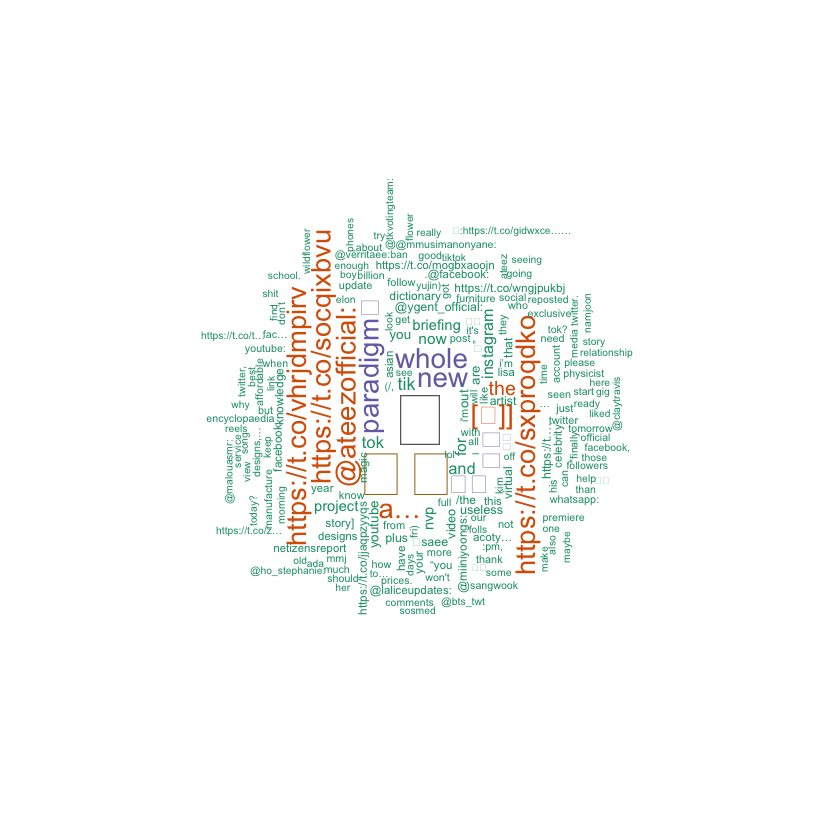

In [10]:
wordcloud(words = d$word, 
          freq = d$freq,
          min.freq = 1, 
          max.words = 200,
          random.order = FALSE, 
          rot.per = 0.35, 
          colors = brewer.pal(8, "Dark2"))

## Conclusion
Start the project by discovering your environment. The level of detail in the data you collect depends on your business needs. If you need to support a business case or provide financial estimates for other purposes, start by collecting the necessary data to create an annual run rate and migration cost estimate. If you don't need financial estimates, focus on the application and infrastructure data you need. These data complement the core data required to create cost estimates and will be used during the analysis phase.

Understanding the dependencies between applications and infrastructure (that is, application-to-application, application-to-infrastructure) is critical to determining the impact of mobile workloads. The amount of data required may also vary depending on factors such as business impact or the extent of the impact if the application is unavailable, as migrations often require planned downtime windows. It is rare that all the data is collected, so use good judgment in deciding when there is enough data to move on to the next stage.

Through data gethering, I get a lot of useful information about our project. These kinds of information will help us understand the topic our project more and will get more information in the next several processes



## Reference

Jha, S. (2022, August 13). Top instagram influencers data (cleaned). Kaggle. Retrieved November 30, 2022, from https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned 

Khaiid. (2022, January 15). 🖱️ will the advertisement be clicked ? Kaggle. Retrieved November 30, 2022, from https://www.kaggle.com/code/khaiid/will-the-advertisement-be-clicked 

Wikimedia Foundation. (2022, November 15). Data collection. Wikipedia. Retrieved November 30, 2022, from https://en.wikipedia.org/wiki/Data_collection 